<a href="https://colab.research.google.com/github/rhehgus02/ESAA_OB/blob/main/%ED%95%B8%EC%A6%88%EC%98%A8_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D(2)_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 4.1 선형회귀

1. 선형회귀 모델의 예측

$$\hat{y} = \theta_0 + \theta_1x_1 + ...+\theta_nx_n$$

* $\hat{y}$은 예측값
* $n$은 특성의 수
* $x_i$는 i번째 특성값
* $\theta_j$는 j번째 모델 파라미터 (편향 $\theta_0$과 특성의 가중치를 포함)

1) 모델을 훈련시킨다는 것은 모델이 **훈련세트**에 가장 잘 맞도록 **모델 파라미터**를 설정하는 것 -> `선형회귀 모델을 훈련시키려면 RMSE를 최소화 하는 수를 찾아야함`



###4.1.1 정규방정식

$$\hat{\theta} = (X^TX)^{-1} X^Ty$$

* $\hat{\theta}$는 비용함수를 최소화 하는 값
* y는 y(1)부터 y(m)까지 포함하는 타깃벡터

In [ ]:
import numpy as np
X = 2* np.random.rand(100,1)
y = 4+3*X + np.random.rand(100,1)

In [ ]:
#넘파이 선형대수 모듈에 있는 inv함수를 사용해 역행렬을 계산하고 dot 메서트를 사용해 행렬 곱셈

X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

* $\theta_0$ = 4 와 $\theta_1$ = 3을 기대했지만 잡음 때문에 원래 함수의 파라미터 정확하게 재현 못함

In [ ]:
theta_best

array([[4.50232125],
       [3.00574125]])

In [ ]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new] #모든 샘플에 x0 = 1추가
y_predict = X_new_b.dot(theta_best)
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.50232125],
       [10.51380375]])

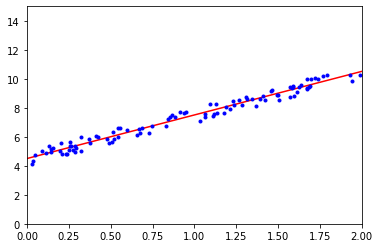

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

* **사이킷런**에서의 선형 회귀 수행

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [ ]:
lin_reg.intercept_,lin_reg.coef_

(array([4.50232125]), array([[3.00574125]]))

In [ ]:
lin_reg.predict(X_new)

array([[ 4.50232125],
       [10.51380375]])

In [ ]:
theta_best_svd,residuals,rank, s = np.linalg.lstsq(X_b,y,rcond = 1e-6)

In [ ]:
theta_best_svd

array([[4.50232125],
       [3.00574125]])

* $\hat{\theta} = X^{+}y$를 계산해주는 함수
* $X^{+}$는 $X$의 **유사역행렬**

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[4.50232125],
       [3.00574125]])

* 유사역행렬 자체는 **특잇값 분해(SVD)**라 부르는 표준 행렬 분해 기법을 사용해 계산됨

1. 훈련 세트 행렬 X를 3개의 행렬 곱셈 $U\sum\ V^{T}$

2. 유사역행렬은 $X^+ = V\sum^+U^T$로 계산됨
3. $\sum^+$를 계산하기 위해 알고리즘이 먼저$\sum$을 구하고 그 다음 어떤 낮은 임곗값보다 작은 모든 수를 0으로 바꿈
4. 그 다음 0이 아닌 모든 값을 역수로 치환함
5. 만들어진 행렬을 전치


###4.1.2 계산 복잡도

: 역행렬을 계산하는 계산복잡도는 일반적으로 $O(n^2.4)$ 에서 $O(n^3)$사이

---
## 4.2 경사 하강법

1. 경사하강법 (GD)의 기본아이디어는 비용함수를 최소화하기 위해 반복해서 파라미터를 조정해나가는 것

2. 중요한 파라미터는 **학습률** : 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행하야 하므로 시간이 오래 걸림

### 4.2.1 배치 경사 하강법

1. `편도함수` : 각 모델 파라미터 $\theta_j$에 대해 비용 함수의 그레이디언트를 계산하는 것

In [ ]:
eta = 0.1 #학습률
n_iterations = 1000
m = 100
import numpy as np

theta = np.random.randn(2,1)

for iteration in range(n_iterations) :
  gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta * gradients

In [ ]:
theta

array([[4.50232125],
       [3.00574125]])

### 4.2.2 확률적 경사 하강법

1. `확률적 경사 하강법` : 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산

  * 매 반복에서 다뤄야 할 데이터가 매우 적기 떄문에 한 번에 하나의 샘플을 처리하면 알고리즘이 **훨씬 빠름** -> `배치 경사 하강법`의 문제 개선
  * **확률적**이기 때문에 배치 경사 하강법보다 **훨씬 불안정**
  * 무작위성은 지역 최솟값에서 탈출시켜줘서 좋지만 알고리즘을 전역 최솟값에 다다르지 못하게 한다는 점에서는 좋지 않음 -> `학습률을 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게 함`

In [ ]:
n_epochs = 50
t0,t1 = 5,50 #학습 스케줄 하이퍼파라미터
m = 100

def learning_schedule(t) :
  return t0 / (t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs) :
  for i in range(m) :
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index +1]
    yi = y[random_index:random_index + 1]
    gradients = 2*xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch*m + i)
    theta = theta - eta * gradients

In [ ]:
theta

array([[4.50266823],
       [3.01701505]])

* 사이킷런에서 SGD 방식으로 선형 회귀를 사용하려면 기본값으로 제곱오차 비용함수를 최적화하는 `SGDRegressor`클래스를 사용

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000,tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.49443741]), array([3.03125998]))

### 4.2.3 미니배치 경사 하강법

1. `미니배치 경사 하강법` : 각 스텝에서 전체 훈련 세트나 하나의 샘플을 기반으로 그레이디언트를 계산하는 것이 아니라 **미니배치**라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산

* 선형회귀를 사용한 알고리즘 비교

|알고리즘|m이 클 때|n이 클 때|하이퍼 파라미터 수|사이킷런|
|---|---|---|---|---|
|정규방정식|빠름|느림|0|N/A|
|SVD|빠름|느림|0|LinearRegression|
|배치 경사 하강법|느림|빠름|2|SGDRegressor|
|확률적 경사 하강법|빠름|빠름|>=2|SGDRegressor|
|미니배치 경사 하강법|빠름|빠름|>=2|SGDRegressor|

---
## 4.3 다항회귀

1. `다항회귀` : 각 특서의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선현 모델을 훈련시키는 것

In [ ]:
m = 100
X = 6*np.random.rand(m,1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

```
PolynomialFeatures(degree = 2, include_bias = False)
```
* `include_bias = True` : 편향을 위한 특성인 1이 추가

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X[0]

array([2.05006325])

In [ ]:
X_poly[0]

array([2.05006325, 4.20275934])

* 확장된 훈련 데이터에 **LinearRegression** 적용

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_


(array([2.0818295]), array([[0.95974454, 0.48904146]]))

---
## 4.4 학습 곡선



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y) :
  X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2)
  train_errors,val_errors = [],[]
  for m in range(1,len(X_train)) :
    model.fit(X_train[:m],y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
  plt.plot(np.sqrt(train_errors),'r-+',linewidth = 2, label = '훈련 세트')
  plt.plot(np.sqrt(val_errors),'b-',linewidth = 3, label = '검증 세트')


* **훈련데이터** (빨간선) : 훈련 세트에 샘플이 추가됨에 따라 곡선이 어느정도 평편해질 때까지 **오차가 계속 상승**

* **검증데이터** : 모델이 적은 수의 훈련 샘플로 훈련될 때는 제대로 일반화될 수 없어서 검증 오차가 **초기에 매우 큼**. 모델에 훈련 샘플이 추가됨에 따라 검증 오차가 **천천히 감소**

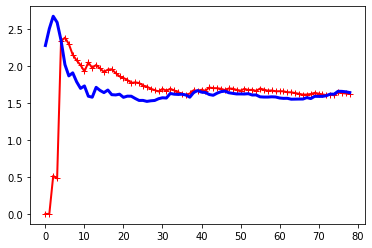

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

* 같은 데이터에서 **10차 다항 회귀 모델의 학습 곡선**

1. 두 곡선 사이에 공간이 있다 -> `훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다` -> **과대적합 모델의 특징**

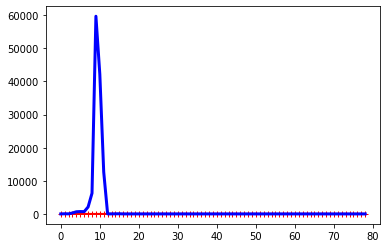

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features',PolynomialFeatures(degree = 10,include_bias = False)),
    ('lin_reg',LinearRegression()),
])

plot_learning_curves(polynomial_regression,X,y)

---
## 4.5 규제가 있는 선형 모델

### 4.5.1 릿지 회귀

1. `릿지 회귀` : 규제가 추가된 선형 회귀 버전
  * 학습 알고리즘을 데이터에 맞추는 것 뿐만 아니라 모델의 가중치가 가능한 한 작게 유지되도록 노력
  * 릿지 회귀의 비용 함수

$$J(\theta) = MSE(\theta) + α{1 \over 2}\sum\limits_{i = 1}^{n} \theta_i ^2$$

* 하이퍼 파라미터 $\alpha$는 모델을 얼마나 많이 **규제**할지 조정



In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = 'cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.84161674]])

* 확률적 경사 하강법 사용

In [ ]:
sgd_reg = SGDRegressor(penalty = 'l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.83193179])

### 4.5.2 라쏘 회귀

1. `라쏘 회귀` : 릿지 회귀처럼 비용함수에 규제항을 더하지만 $l_2$ 노름의 제곱을 2로 나눈 것 대신 가중치 벡터의 $l_1$노름 사용
  * 덜 중요한 가중치 **제거**하려는 특성
  * 자동으로 특성 선택을 하고 **희소 모델**을 만듬

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.79509672])

### 4.5.3 엘라스틱넷

1. `엘라스틱넷` : 릿지 회귀와 라쏘 회귀를 절충한 모델
  * 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용
  * 혼합정도는 혼합 비율 r을 사용해 조절

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1,l1_ratio = 0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.79952898])

### 4.5.4 조기 종료

: 검증 에러가 최솟값에 도달하면 바로 훈련을 **중지**시키는 것

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 90, include_bias = False)),
    ('std_scaler', StandardScaler())

])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start = True, penalty = None, learning_rate = 'constant',eta0 = 0.0005)
minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000) :
  sgd_reg.fit(X_train_poly_scaled,y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error :
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

---
## 4.6 로지스틱 회귀

* `로지스틱 회귀` : 샘플이 특정 클래스에 속할 확률을 추정하는 데 널리 사용

### 4.6.1 확률 추정

1. 선형 회귀 모델과 가이 로지스틱 회귀 모델은 입력 특성의 **가중치 합** 계산
2. 대신 선형 회귀처럼 결과를 바로 출력하지 않고 결괏값의 **로지스틱** 출력
3. 로지스틱은 0과 1 사이의 값을 출력하는 **시그모이드 함수**

* `시그모이드 함수`

$$\sigma(t) = {1 \over 1+ e^{-t}}$$

### 4.6.2 훈련과 비용함수

1. 훈련의 목적 : 양성 샘플(y=1)에 대해서는 **높은 확률 추정**하고 음성 샘플(y=0)에 대해서는 **낮은 확률 추정**하는 모델의 파라미터 벡터를 찾는 것

### 4.6.3 결정 경계

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
X = iris['data'][:,3:]
y = (iris['target'] == 2).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
#로지스틱 회귀 모델 훈련

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

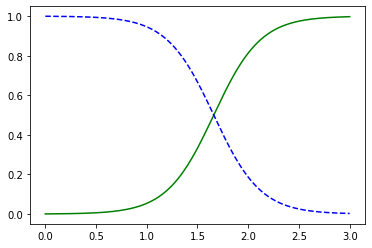

In [ ]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1],'g-',label = 'Iris virginica')
plt.plot(X_new,y_proba[:,0],'b--',label = 'Not Iris virginica')

In [ ]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

### 4.6.4 소프트맥스 회귀

1. 샘플 x가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수를 계산하고, 그 점수에 소프트맥스 함수를 적용하여 각 클래스의 확률을 추정

2. 소프트 맥스 함수

$$\hat{p_k} = \sigma(s(x))_k = {exp(s_k(x)) \over \sum\limits_{j = 1}^{K}exp(s_j(x))}$$

* $K$는 각 클래스 의 수
* s(x)는 샘플x에 대한 각 클래스의 점수를 담은 벡터
* $\sigma(x(x))_k$는 샘플 x에 대한 각 클래스의 점수가 주어졌을 떄 이 샘플이 클래스 k에 속할 추정 확률


3. 크로스 엔트로피 비용함수

  * 크로스 엔트로피 비용 함수를 최소화하는 것은 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제하므로 이 모델이 타깃 클래스에 대해서 높은 확률을 추정하도록 하는 데 좋음

```
LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
```

* `multi_class = 'multinomial` : 소프트맥스 회귀 사용
* `solver = 'lbfgs` : 소프트 맥스회귀를 지원하는 알고리즘 지정

In [ ]:
X = iris['data'][:,(2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class = 'multinomial',solver = 'lbfgs',C = 10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [ ]:
softmax_reg.predict([[5,2]])
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])